In [223]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date, timedelta
from matplotlib.pyplot import cm
from scipy.stats import pearsonr,spearmanr

from minepy import MINE
from minepy import pstats, cstats

%matplotlib inline


In [228]:
mydir = '/home/sdeng/workspace/gdelt_data_preprocess/event/'
# file_list = glob.glob(mydir + "*NI*.json")
# file_list = glob.glob(mydir + "*CA*.json")
country_name = 'EG'
# country_name = 'NI'

file_list = glob.glob(mydir + "*{}*.json".format(country_name))
file_list

['/home/sdeng/workspace/gdelt_data_preprocess/event/event.2019.EG.json',
 '/home/sdeng/workspace/gdelt_data_preprocess/event/event.2018.EG.json',
 '/home/sdeng/workspace/gdelt_data_preprocess/event/event.2015.EG.json',
 '/home/sdeng/workspace/gdelt_data_preprocess/event/event.2016.EG.json',
 '/home/sdeng/workspace/gdelt_data_preprocess/event/event.2017.EG.json',
 '/home/sdeng/workspace/gdelt_data_preprocess/event/event.2020.EG.json']

In [229]:
df_list = []
for f in file_list:
    cur_df = pd.read_json(f,lines=True)
    df_list.append(cur_df)
#     print(cur_df.head())
#     break
    
df = pd.concat(df_list, ignore_index=True)
df['event_date'] = pd.to_datetime(df['event_date'],format='%Y%m%d' )
df.sort_values(by=['event_date'],inplace=True) 
df = df.loc[df['IsRootEvent'] == 1]

df['event_date'] = df.event_date.dt.strftime('%Y-%m-%d')
df = df.loc[df['event_date']>='2015-01-01']

In [230]:
# print(df.columns)
print(len(df))
df

776709


,GlobalEventID,event_date,Actor1Code,Actor1Name,Actor2Code,Actor2Name,IsRootEvent,EventCode,QuadClass,GoldsteinScale,NumMentions,NumArticles,AvgTone,ActionGeo_Type,ActionGeo_Fullname,ActionGeo_CountryCode,SOURCEURL,SentenceID,MentionIdentifier
691526,498636806,2015-01-01,EGY,EGYPT,GOV,PRESIDENT,1,84,2,7.0,2,2,-3.9867,1,Egypt,EG,http://www.westfieldtimes.com/uk/reporter-laun...,2,http://www.westfieldtimes.com/uk/reporter-laun...
691415,498605150,2015-01-01,NLD,NETHERLANDS,USA,UNITED STATES,1,84,2,7.0,1,1,1.0493,1,Egypt,EG,http://www.residentadvisor.net/event.aspx?787350,3,http://www.residentadvisor.net/event.aspx?787350
692256,498879367,2015-01-02,BUS,INDUSTRY,EGY,EGYPT,1,42,1,1.9,3,3,1.2000,1,Egypt,EG,http://kwit.org/post/russians-find-favored-hol...,5,http://kwit.org/post/russians-find-favored-hol...
692112,498833209,2015-01-02,JUD,PROSECUTOR,OPP,ACTIVIST,1,173,4,-5.0,20,20,-7.0286,4,"Cairo, Al Qahirah, Egypt",EG,http://www.huffingtonpost.com/huff-wires/20160...,6,http://www.huffingtonpost.com/huff-wires/20160...
692257,498879370,2015-01-02,EGY,EGYPT,BUS,INDUSTRY,1,43,1,2.8,3,3,1.2000,1,Egypt,EG,http://kwit.org/post/russians-find-favored-hol...,5,http://kwit.org/post/russians-find-favored-hol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359674,962130239,2020-12-31,BUS,BUSINESS,nan,nan,1,13,1,0.4,10,10,6.7797,4,"Kairo, Al Qahirah, Egypt",EG,https://www.timeslive.co.za/tshisa-live/tshisa...,2,https://www.timeslive.co.za/tshisa-live/tshisa...
1359673,962129141,2020-12-31,YEM,YEMEN,REB,REBEL,1,51,1,3.4,2,2,-7.4910,4,"Cairo, Al Qahirah, Egypt",EG,https://www.wbtv.com/2020/12/30/yemeni-officia...,3,https://www.wbtv.com/2020/12/30/yemeni-officia...
1359668,962128594,2020-12-31,EGY,EGYPT,GOV,GOVERNMENT,1,50,1,3.5,7,7,-1.9538,4,"Cairo, Al Qahirah, Egypt",EG,https://www.middleeastmonitor.com/20201231-is-...,1,https://www.middleeastmonitor.com/20201231-is-...
1359667,962128591,2020-12-31,EGY,EGYPT,ETH,ETHIOPIAN,1,40,1,1.0,4,4,-4.4355,4,"Cairo, Al Qahirah, Egypt",EG,https://gulfnews.com/world/mena/egypt-summons-...,1,https://gulfnews.com/world/mena/egypt-summons-...


In [231]:
# df_drop = df.drop_duplicates(subset=['event_date','Actor1Code','Actor1Name','Actor2Code','Actor2Name','IsRootEvent','EventCode'], keep='first')
# df['GlobalEventID'].unique().shape

In [232]:
# df_drop2 = df.loc[df['IsRootEvent'] == 1]
# df_drop2

In [233]:
def getRoot(x):
    x = int(x)
    if len(str(x)) == 4: # 1128
        return x // 100
    elif len(str(x)) == 3:
        if x // 10 < 20: # 190
            return x // 10
        else:
            return x // 100
    else:
        return x // 10

# def movingaverage(interval, window_size):
#     window = np.ones(int(window_size))/float(window_size)
#     return np.convolve(interval, window, 'same')
# df['RootEventCode'] = df['EventCode'].apply(lambda x: x.split('_')[1] if x.find('_')!=-1 else x )
# df['RootEventCode'] = df['EventCode'].apply(lambda x: str(x)[:2] )

df = df.loc[df['EventCode'] != '---'] 
df['RootEventCode'] = df['EventCode'].apply(lambda x: getRoot(x) )
 

In [234]:
df.head(10)

,GlobalEventID,event_date,Actor1Code,Actor1Name,Actor2Code,Actor2Name,IsRootEvent,EventCode,QuadClass,GoldsteinScale,NumMentions,NumArticles,AvgTone,ActionGeo_Type,ActionGeo_Fullname,ActionGeo_CountryCode,SOURCEURL,SentenceID,MentionIdentifier,RootEventCode
691526,498636806,2015-01-01,EGY,EGYPT,GOV,PRESIDENT,1,84,2,7.0,2,2,-3.9867,1,Egypt,EG,http://www.westfieldtimes.com/uk/reporter-laun...,2,http://www.westfieldtimes.com/uk/reporter-laun...,8
691415,498605150,2015-01-01,NLD,NETHERLANDS,USA,UNITED STATES,1,84,2,7.0,1,1,1.0493,1,Egypt,EG,http://www.residentadvisor.net/event.aspx?787350,3,http://www.residentadvisor.net/event.aspx?787350,8
692256,498879367,2015-01-02,BUS,INDUSTRY,EGY,EGYPT,1,42,1,1.9,3,3,1.2000,1,Egypt,EG,http://kwit.org/post/russians-find-favored-hol...,5,http://kwit.org/post/russians-find-favored-hol...,4
692112,498833209,2015-01-02,JUD,PROSECUTOR,OPP,ACTIVIST,1,173,4,-5.0,20,20,-7.0286,4,"Cairo, Al Qahirah, Egypt",EG,http://www.huffingtonpost.com/huff-wires/20160...,6,http://www.huffingtonpost.com/huff-wires/20160...,17
692257,498879370,2015-01-02,EGY,EGYPT,BUS,INDUSTRY,1,43,1,2.8,3,3,1.2000,1,Egypt,EG,http://kwit.org/post/russians-find-favored-hol...,5,http://kwit.org/post/russians-find-favored-hol...,4
692461,498947503,2015-01-03,KWT,KUWAIT,OPP,ACTIVIST,1,173,4,-5.0,10,10,-8.0925,1,Egypt,EG,http://www.zawya.com/story/Kuwaiti_arrested_fo...,2,http://www.zawya.com/story/Kuwaiti_arrested_fo...,17
692734,499018411,2015-01-03,ZWE,BULAWAYO,FRA,FRANCE,1,180,4,-9.0,2,2,-2.9851,1,Egypt,EG,http://www.defensenews.com/story/defense/naval...,2,http://www.defensenews.com/story/defense/naval...,18
692286,498887198,2015-01-03,BUS,INDUSTRY,EGY,EGYPT,1,42,1,1.9,5,5,1.1867,1,Egypt,EG,http://www.kvlu.org/russians-find-favored-holi...,5,http://kanw.com/post/russians-find-favored-hol...,4
692287,498887204,2015-01-03,EGY,EGYPT,BUS,INDUSTRY,1,43,1,2.8,5,5,1.1867,1,Egypt,EG,http://www.kvlu.org/russians-find-favored-holi...,5,http://kanw.com/post/russians-find-favored-hol...,4
692288,498887212,2015-01-03,JUD,PROSECUTOR,OPP,ACTIVIST,1,173,4,-5.0,10,10,-7.0796,4,"Cairo, Al Qahirah, Egypt",EG,http://www.yakimaherald.com/entertainment/movi...,6,http://www.yakimaherald.com/entertainment/movi...,17


In [235]:
start_year = 2015
start_month = 1
start_day = 1
end_year = 2020
end_month = 12
end_day = 31
event_type_column = 'EventCode'
event_type_column = 'RootEventCode'
delta_value = 1
if delta_value == 1:
    level = 'day'
elif delta_value == 7:
    level = 'week'
elif delta_value == 14:
    level = 'biweek'
elif delta_value == 30:
    level = 'month'
subevents = df[event_type_column].unique()
print(len(subevents),subevents)
subevent_count_dict = {}
start_date = date(start_year, start_month, start_day)
end_date = date(end_year, end_month, end_day)
delta = timedelta(days=delta_value)
n_days = 0
last_date = start_date - delta
while start_date <= end_date:
#     print('last_date',last_date,'start_date',start_date )
    last_date = start_date
    start_date += delta
    n_days += 1
print('n_days =',n_days)
# print('n_days =',len(df['event_date'].unique()))
for v in subevents:
    subevent_count_dict[v] = np.array([0 for i in range(n_days)])


19 [ 8  4 17 18  3 16  5  1  2 19 11  6 12  9 14 13  7 15 10]
n_days = 2192


In [236]:
# for loop day.... save count of each subevent.
start_date = date(start_year, start_month, start_day)
end_date = date(end_year, end_month, end_day)
delta = timedelta(days=delta_value)
day_i = 0
last_date = start_date - delta
# print('last_date',last_date,'start_date',start_date,'end_date',end_date)

while start_date <= end_date:
#     print('last_date',last_date,'start_date',start_date )
    last_date_str = last_date.strftime("%Y-%m-%d") #("%d %B %Y")
    date_str = start_date.strftime("%Y-%m-%d")
#     print('last_date_str',last_date_str,' --- date_str',date_str)
    df_day = df.loc[(df['event_date'] > last_date_str) & (df['event_date'] <= date_str)]
    if day_i%300==0:
        print('#',len(df_day),len(df))
#         print(df_day['sub_event_type'] )
    df_count = df_day[event_type_column].value_counts().rename_axis('unique_values').reset_index(name='counts')
#     print('df_count',df_count,df)
    for i,row in df_count.iterrows():
        subevent_count_dict[row['unique_values']][day_i] = row['counts']
    last_date = start_date
    start_date += delta
    day_i += 1
print('day_i =',day_i)

# 2 776709
# 490 776709
# 446 776709
# 390 776709
# 251 776709
# 238 776709
# 214 776709
# 162 776709
day_i = 2192


In [184]:
# subevent_count_dict
# df['event_date']

691526     2015-01-01
691415     2015-01-01
691342     2015-01-01
692256     2015-01-02
692112     2015-01-02
              ...    
1359668    2020-12-31
1359667    2020-12-31
1359666    2020-12-31
1359664    2020-12-31
1359890    2020-12-31
Name: event_date, Length: 1355481, dtype: object

2192 2192


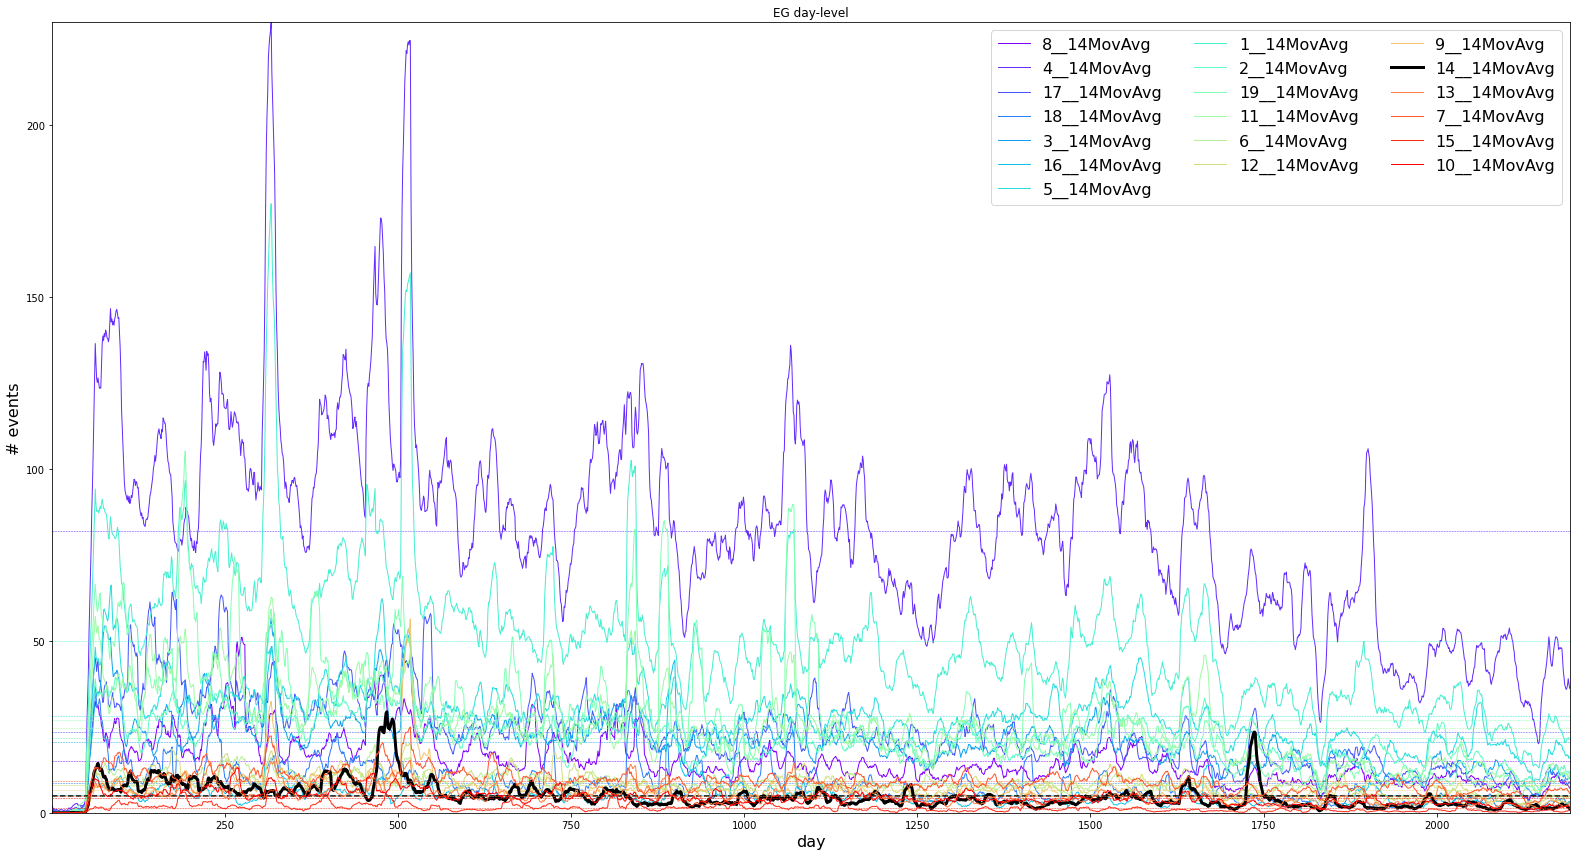

In [241]:
# Fixing random state for reproducibility


def movingaverage(a, n=3) :
    padding = []
    for i in range(n-1):
        padding.append(a[:i+1].mean())
    padding = np.array(padding)
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return np.concatenate((padding, ret[n - 1:] / n),0)


t = np.arange(1, day_i+1, 1) 
print(len(t),len(subevent_count_dict[4]))
color=cm.rainbow(np.linspace(0,1,len(subevents)))

fig, axs = plt.subplots(1, 1,figsize=(22, 12))
event_set = ['Protests','Violent demonstration','Protest with intervention','Excessive force against protesters','Peaceful protest']
event_set = ['Battles', 'Explosions/Remote violence', 'Strategic developments','Violence against civilians', 'Protests', 'Riots']
event_set = [1,2,3,4,8,9,10,11,14]
event_set = np.arange(1,21,1)
# event_set = ['Violence against civilians', 'Protests', 'Riots']
# event_set = [  'Explosions/Remote violence']
for i in range(len(subevents)):
    if subevents[i] in event_set :
#         axs.plot(t, subevent_count_dict[subevents[i]], 's',label=subevents[i])
        ma_day = 14
        count_data = subevent_count_dict[subevents[i]][:]
        cur_t = t
        ma = movingaverage(count_data,ma_day)
        cur_label = str(subevents[i])+'__'+str(ma_day)+'MovAvg'
        if ma_day == 1:
            cur_label = str(subevents[i]) 
        if subevents[i] == 14:
#             axs.plot(t[:], ma, '-',label=cur_label,color=color[i],linewidth=4)
#             axs.axhline(y=count_data.mean(), color=color[i],  linestyle='--',linewidth=4)
            axs.plot(cur_t, ma, '-',label=cur_label,color='black',linewidth=3)
            axs.axhline(y=count_data.mean(), color='black',  linestyle='--',linewidth=1.5)
        else:
            axs.plot(cur_t, ma, '-',label=cur_label,color=color[i],linewidth=1)
            axs.axhline(y=count_data.mean(), color=color[i],  linestyle='--',linewidth=0.5)


axs.set_xlabel(level,fontsize=16)
axs.set_ylabel('# events',fontsize=16)
# axs.grid(True)
axs.legend(prop={'size': 16},ncol=3)
# cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
# axs[1].set_ylabel('coherence')
axs.margins(0.0)
axs.set_title('{} {}-level'.format(country_name,level))
# axs.set_title('Yemen week-level')

fig.tight_layout()
plt.show()
fig.savefig('time_series/GDELT_{}_{}.pdf'.format(country_name,level), bbox_inches='tight')

 

In [237]:
# get outcome variable 
protests_count = subevent_count_dict[14]
# print()
protests_count = np.where(protests_count < protests_count.mean(), 0, 1)
print('mean',protests_count.mean(),protests_count.shape)

# get treatment variables
def get_avg(x,day=8):
    r = []
    for i in range(0,len(x),day):
        avg = x[i:i+day].mean()
        r += [avg for i in range(day)]
    r = np.array(r)
#     print(r)
    return r
# protests_count[16:].shape
         

mean 0.39461678832116787 (2192,)


In [238]:
event_set_protest = [14]
bi_trend_dict = {}
ma_day = 14
for i in range(len(subevents)):
#     if subevents[i] in event_set_protest:
#         continue
    count_data = subevent_count_dict[subevents[i]]
    ma = movingaverage(count_data,ma_day)
    cur_trend = ma[ma_day*2-1:]
    prev_trend = ma[ma_day-1:ma_day-1+len(cur_trend)]
#     print(prev_trend,'prev')
#     print(cur_trend,'curr')
    bi_trend = np.where((cur_trend-prev_trend)>0,1,0)
    bi_trend_dict[subevents[i]] = bi_trend
#     break
print(bi_trend[:],bi_trend.shape)

[0 0 0 ... 1 1 1] (2165,)


In [239]:
# get association
data2 = protests_count[ma_day*2:]
print(data2.shape)

# x = np.linspace(0, 1, 1000)
# y = np.sin(10 * np.pi * x) + x



for i in range(len(subevents)):
#     if subevents[i] in event_set_protest:
#         continue
    data1 = bi_trend_dict[subevents[i]][:-1]
    corr, p = pearsonr(data1, data2)
    print(subevents[i],'pearsonr',corr*100,p,(p<0.05))
    corr, p = spearmanr(data1, data2)
    print(subevents[i],'spearmanr',corr*100,p,(p<0.05))
    
    mine = MINE(alpha=0.6, c=15, est="mic_e")
    mine.compute_score(data1, data2)
#     mic_p, tic_p = cstats(data1, data1, alpha=0.6, c=15, est="mic_e")
    print(mine.mic()*100)

(2164,)
8 pearsonr 4.207112627637444 0.050366934689676734 False
8 spearmanr 4.207112627637441 0.05036693468970861 False
0.12770478578695663
4 pearsonr 3.9057108470859525 0.0692885492975885 False
4 spearmanr 3.905710847085954 0.06928854929763338 False
0.11007338008181913
17 pearsonr 6.246491829188301 0.0036496694933359193 True
17 spearmanr 6.246491829188306 0.003649669493338666 True
0.2815235041502472
18 pearsonr 5.612656094094009 0.009014833643996988 True
18 spearmanr 5.612656094094012 0.009014833644002069 True
0.2271439482464101
3 pearsonr 5.2639619133398705 0.014324719465278387 True
3 spearmanr 5.2639619133398705 0.014324719465286831 True
0.1999324642007285
16 pearsonr 0.733813585843004 0.7329765613542183 False
16 spearmanr 0.7338135858430008 0.7329765613545995 False
0.0038839311605981413
5 pearsonr 3.454047306605506 0.10820082165130698 False
5 spearmanr 3.4540473066055037 0.10820082165137229 False
0.08604103246467491
1 pearsonr 4.207648175849468 0.05033761988372321 False
1 spearmanr

/home/sdeng/anaconda2/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0.05551393587415554
12 pearsonr 7.229554045594397 0.0007638730495638763 True
12 spearmanr 7.2295540455943925 0.0007638730495642458 True
0.37711863042320665
9 pearsonr 4.324374028008994 0.0442804707295176 True
9 spearmanr 4.324374028008992 0.044280470729540486 True
0.1348531448180863
14 pearsonr 9.785914815904848 5.100502956999388e-06 True
14 spearmanr 9.78591481590485 5.1005029570023236e-06 True
0.6905127641200354
13 pearsonr -0.9250167221938083 0.6671466298143724 False
13 spearmanr -0.9250167221938049 0.6671466298148376 False
0.006172485336283036
7 pearsonr 2.512289944685873 0.24272747602548497 False
7 spearmanr 2.512289944685873 0.24272747602560188 False
0.04554372469707408
15 pearsonr 4.288905731889079 0.04605234683870991 True
15 spearmanr 4.288905731889081 0.046052346838740404 True
0.13263292336685018
10 pearsonr 4.96710474256227 0.0208478020649279 True
10 spearmanr 4.967104742562269 0.02084780206494249 True
0.17791954689542563


In [240]:
country_name

'EG'